## Asses the performance of a supervised classifiers

In [2]:
# Import the required libraries
import pandas as pd # Pandas deals with handling data. 
import numpy as np # Numpy provides a lot of FAST ways for array manipulation in python.
import matplotlib.pyplot as plt # Plotting script library
import matplotlib as mpl # Plotting
import seaborn as sns # More plotting
import numpy as np

%matplotlib inline 
# Define some plotting params:
mpl.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid", {"axes.facecolor": ".99"})

#### Import data from openML - do train, valid, splitting

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml(name='adult', version=1)
X = pd.DataFrame(data=data.data, columns=data.feature_names).fillna(method='pad') 
y = data.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

rf = RandomForestClassifier(max_leaf_nodes=8).fit(X_train, y_train)
y_pred = rf.predict(X_valid)

print(classification_report(y_valid, y_pred, digits=4))

              precision    recall  f1-score   support

       <=50K     0.8531    0.9553    0.9013      9286
        >50K     0.7710    0.4776    0.5898      2925

    accuracy                         0.8409     12211
   macro avg     0.8120    0.7165    0.7456     12211
weighted avg     0.8334    0.8409    0.8267     12211



What are precision, recall, and F1?

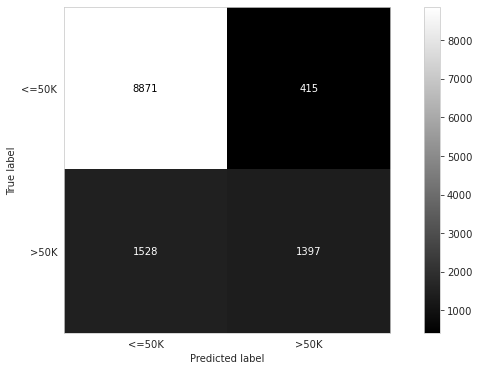

In [6]:
plot_confusion_matrix(rf, X_valid, y_valid, cmap='gray')
plt.grid(False)

In [32]:
N = 1000000
y_true_pred = np.vstack((y_valid[:N], y_pred[:N])).T

y_true_pred = np.concatenate((y_true_pred, (y_true_pred[:, 0] == y_true_pred[:, 1]).reshape(-1, 1)), axis=1)
y_true_pred

array([['<=50K', '<=50K', True],
       ['<=50K', '<=50K', True],
       ['<=50K', '<=50K', True],
       ...,
       ['<=50K', '<=50K', True],
       ['<=50K', '<=50K', True],
       ['>50K', '>50K', True]], dtype=object)

In [37]:
TP = lambda pos_label, y_true_pred: ((y_true_pred[:, 0] == pos_label) & (y_true_pred[:, 1] == pos_label)).sum()
FP = lambda pos_label, y_true_pred: ((y_true_pred[:, 0] != pos_label) & (y_true_pred[:, 1] == pos_label)).sum()
TN = lambda pos_label, y_true_pred: ((y_true_pred[:, 0] != pos_label) & (y_true_pred[:, 1] != pos_label)).sum()
FN = lambda pos_label, y_true_pred: ((y_true_pred[:, 0] == pos_label) & (y_true_pred[:, 1] != pos_label)).sum()

pos_label = '>50K'

np.array([[TN(pos_label, y_true_pred), FP(pos_label, y_true_pred)],
          [FN(pos_label, y_true_pred), TP(pos_label, y_true_pred)]])

array([[8871,  415],
       [1528, 1397]])

In [39]:
precision = lambda pos_lab, y_arr: TP(pos_lab, y_arr)/(TP(pos_lab, y_arr) + FP(pos_lab, y_arr))
recall = lambda pos_lab, y_arr: TP(pos_lab, y_arr)/(TP(pos_lab, y_arr) + FN(pos_lab, y_arr))

print('Precision: {:.4f}'.format(precision(pos_label, y_true_pred)))
print('Recall:    {:.4f}'.format(recall(pos_label, y_true_pred)))

Precision: 0.7710
Recall:    0.4776
